In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the same data file that you have used in the previous lab (round 3). You can continue using the same Jupyter notebook.

In [2]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import data_preparation as dp  

In [3]:
# get data 
# url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
url = 'insurance_data.csv'
insurance_data = pd.read_csv(url)
insurance_data = dp.clean_insurance_data(insurance_data)
insurance_data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
1,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
2,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
3,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
4,OC83172,Oregon,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1063,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1064,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2,Personal Auto,SUV,207.320041
1065,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1066,CW49887,California,F,Master,462680.11,79487.0,114.0,0,Special Auto,SUV,547.200000


> **Check the data types of the columns.** 

> Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical.(You can use np.number and object to select the numerical data types and categorical data types respectively)

In [3]:
numerical = insurance_data.select_dtypes(include=np.number)
categorical = insurance_data.select_dtypes(include=object)

In [4]:
# verify:
#numerical

In [5]:
# verify:
#categorical

In [6]:
insurance_data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

>**Now we will try to check the normality of the numerical variables visually**

>Use seaborn library to construct distribution plots for the numerical variables

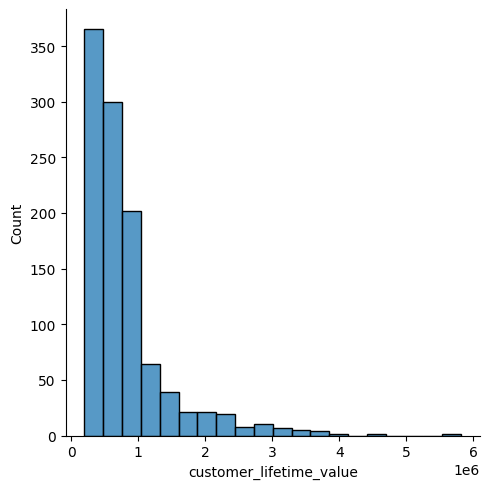

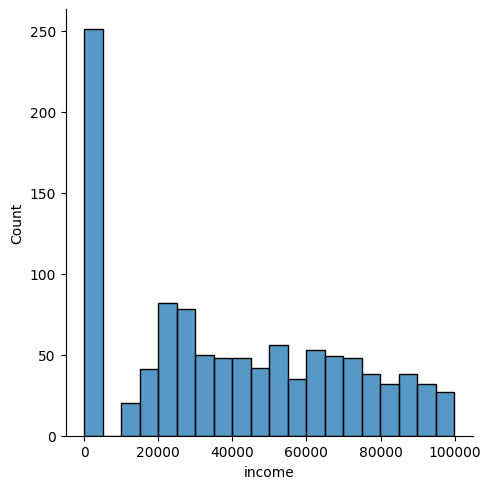

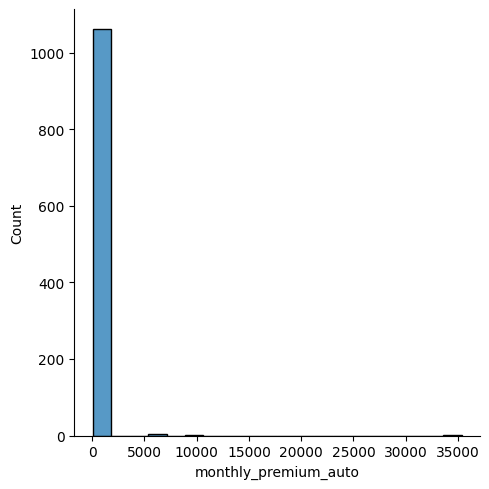

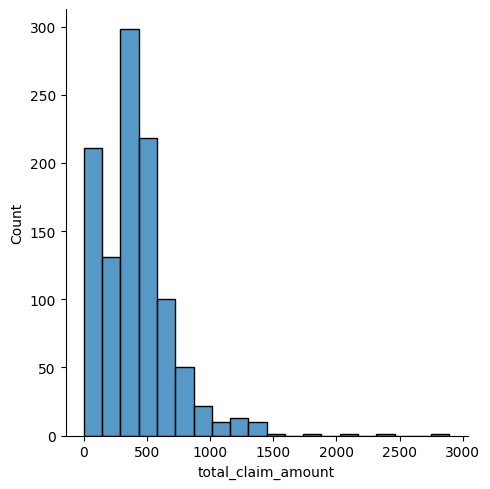

In [7]:
for column in numerical:
    sns.displot(insurance_data[column], bins=20)

>Use Matplotlib to construct histograms

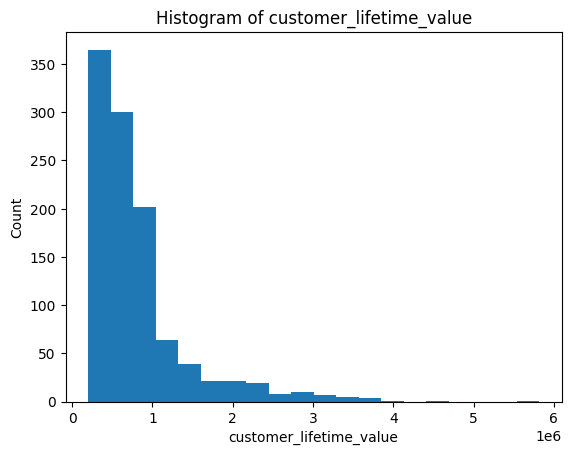

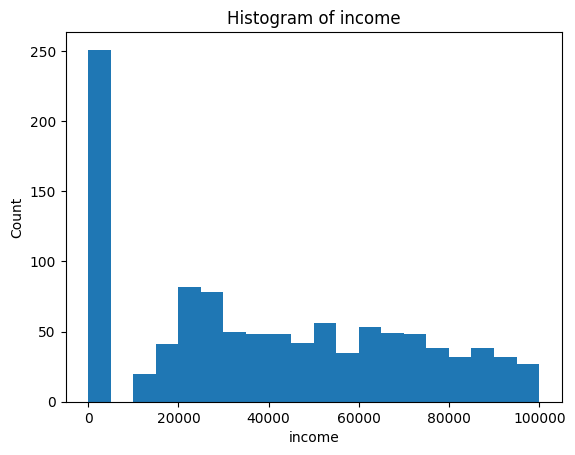

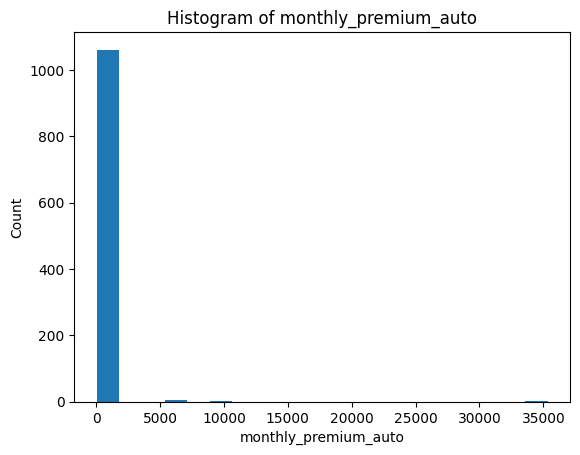

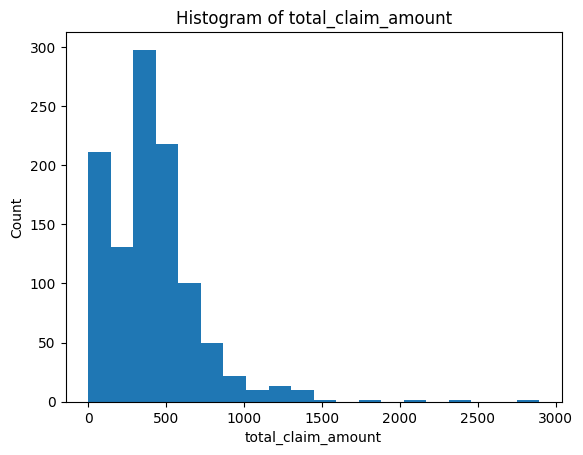

In [8]:
for column in numerical:
    plt.hist(insurance_data[column], bins=20)
    #added some info
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count') 
    plt.show()


>Do the distributions for different numerical variables look like a normal distribution?
- no, they don't

>**For the numerical variables, check the multicollinearity between the features. Please note that we will use the 
column total_claim_amount later as the target variable.**

In [9]:
# retrieve numerical colummn names
numerical_columns = numerical.columns.to_list()
print(numerical_columns)

# assign
y = insurance_data['total_claim_amount'] 
X = insurance_data[numerical_columns]
#verify
X

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,697953.59,0.0,94.0,1131.464935
1,1288743.17,48767.0,108.0,566.472247
2,764586.18,0.0,106.0,529.881344
3,536307.65,36357.0,68.0,17.269323
4,825629.78,62902.0,69.0,159.383042
...,...,...,...,...
1063,305955.03,38644.0,78.0,361.455219
1064,2031499.76,63209.0,102.0,207.320041
1065,323912.47,16061.0,88.0,633.600000
1066,462680.11,79487.0,114.0,547.200000


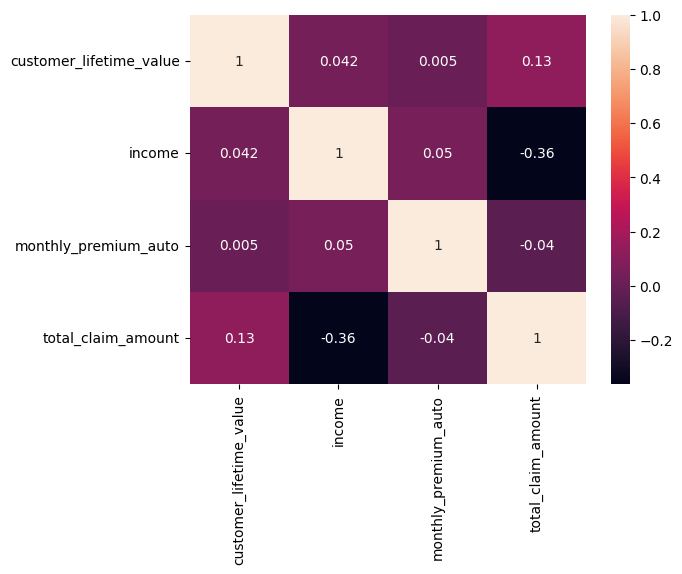

In [10]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

>**Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features**
- no pair